## Alignment Quality - Ext. Data Figure 2

This notebook creates the plots presented in Ext. Data Figure 2 of the FlyWire paper. 

In [1]:
import os
import dill
import warnings
import pandas as pd
import numpy as np

warnings.filterwarnings("ignore")

In [2]:
from flywirepaper import plotting

## Define relevant paths and create directories

In [3]:
data_dir = f"{os.path.realpath('')}/../data"
figure_dir = f"{os.path.realpath('')}/../figures/ext_figure_2/"
figure_source_dir = f"{os.path.realpath('')}/../figures/ext_figure_source_2/"

if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)
    
if not os.path.exists(figure_source_dir):
    os.makedirs(figure_source_dir)

## Loading and relative CPC

This csv contains precomputed chunked pearson correlation (CPC) measurements between neighboring slices for both the realigned volume (v14.1, "aligned" in the table below) and the original volume (v14, "raw" in the table below). The table below contains the summed CPC values per slice.

In [4]:
cpc_df = pd.read_csv(f"{data_dir}/fafb_v141_v14_delta_cpc.csv")
cpc_df = cpc_df.iloc[4:-1] # We exlude slices without data

In [5]:
cpc_df.head(5)

,z,raw sum,aligned sum
4,5,314972,322031
5,6,407341,414798
6,7,359828,366126
7,8,385068,384911
8,9,293421,290541


Here, we calculate the relative cpc change:

In [6]:
cpc_df["rel_cpc_change"] = (cpc_df["aligned sum"] - cpc_df["raw sum"]) / cpc_df["raw sum"]

Due to missing slices, summed CPCs can be zero leading to nan values after the division above.

In [7]:
cpc_df = cpc_df[~np.isnan(cpc_df["rel_cpc_change"])]

## a: relative CPC change per slice

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


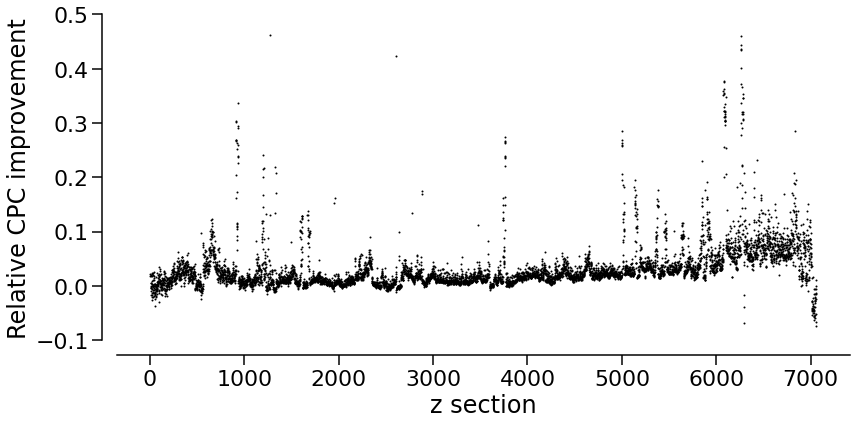

In [8]:
plotting.scatter_plot(cpc_df["z"], 
                      cpc_df["rel_cpc_change"],
                      figsize=(12, 6), marker_size=2,
                      yrange=[-.1, .5],
                      xlabel="z section", 
                      ylabel="Relative CPC improvement",
                      path=f"{figure_dir}/total_cpc_over_sections.png")

## b: relative CPC change as histogram

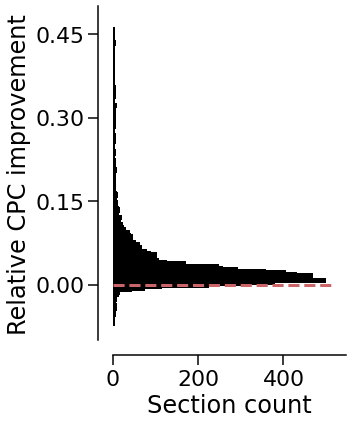

In [10]:
plotting.hist_plot(cpc_df["rel_cpc_change"], 
                   figsize=(5, 6), 
                   nbins=200, 
                   horizontal_lines=[0],
                   normalize=False,
                   ylabel="Relative CPC improvement", 
                   xlabel="Section count",
                   orientation="horizontal", 
                   yrange=[-.1, .5],
                   path=f"{figure_dir}/total_cpc_over_sections_hist_h.png")

In [11]:
cpc_df.to_csv(f"{figure_source_dir}/ab_source.csv")